In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
import tensorflow as tf
from matplotlib.pyplot import figure

In [2]:
drive.mount('/content/drive', force_remount=True)
datadir = "/content/drive/MyDrive/archive/Amazon.csv"
dataset = pd.read_csv(datadir, index_col = "Date");

Mounted at /content/drive


In [16]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2020-08-10,3170.310059,3172.510010,3101.520020,3148.159912,3148.159912,3167300
2020-08-11,3113.199951,3159.219971,3073.000000,3080.669922,3080.669922,3718100
2020-08-12,3108.000000,3174.389893,3101.419922,3162.239990,3162.239990,3527200


In [20]:
training_set = pd.DataFrame(dataset["High"][0: int(len(dataset) * 0.8)])
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set.shape

(4681, 1)

In [44]:
x_train = []
y_train = []
step = 70
future = 7

for i in range(step, training_set.shape[0]):
  if i+future <= training_set.shape[0]:
    x_train.append(scaled_training_set[i-step:i, 0])
    y_train.append(scaled_training_set[i:i+future, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
y_train.shape 

(4605, 7)

In [77]:
#######################SINGLE OUTPUT###########################
x_train = []
y_train = []
step = 70

for i in range(step, training_set.shape[0]):
    x_train.append(scaled_training_set[i-step:i, 0])
    y_train.append(scaled_training_set[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_train.shape

(4611, 1)

In [78]:
model = Sequential()

#1st layer
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])) )
model.add(Dropout(0.2))
#2nd layer
model.add(LSTM(units = 50, activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
#3rd layer
model.add(LSTM(units = 50, activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
#4th layer
model.add(LSTM(units = 50, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = y_train.shape[1]))

In [84]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
145/145 [==============================] - 29s 159ms/step - loss: 0.0130
Epoch 2/100
145/145 [==============================] - 23s 160ms/step - loss: 0.0017
Epoch 3/100
145/145 [==============================] - 23s 161ms/step - loss: 0.0015
Epoch 4/100
145/145 [==============================] - 23s 159ms/step - loss: 0.0014
Epoch 5/100
145/145 [==============================] - 23s 160ms/step - loss: 0.0014
Epoch 6/100
145/145 [==============================] - 23s 158ms/step - loss: 0.0013
Epoch 7/100
145/145 [==============================] - 23s 158ms/step - loss: 0.0013
Epoch 8/100
145/145 [==============================] - 23s 161ms/step - loss: 0.0012
Epoch 9/100
145/145 [==============================] - 24s 169ms/step - loss: 0.0012
Epoch 10/100
145/145 [==============================] - 23s 161ms/step - loss: 0.0011
Epoch 11/100
145/145 [==============================] - 23s 158ms/step - loss: 0.0012
Epoch 12/100
145/145 [==============================] - 23s 158

In [86]:
!mkdir -p saved_model
model.save('saved_model/amazon_model2') 

INFO:tensorflow:Assets written to: saved_model/amazon_model2/assets


INFO:tensorflow:Assets written to: saved_model/amazon_model2/assets


My saved models: 

amazon_model for 70 input 7 output

amazon_model2 for 70 input 1 output

In [152]:
!mkdir -p saved_model
!ls saved_model
new_model = tf.keras.models.load_model('saved_model/amazon_model')

amazon_model  amazon_model2


In [153]:
test_set = pd.DataFrame(dataset["High"][int(len(dataset) * 0.8):int(len(dataset))])
past_days = training_set.tail(step)
test_set = past_days.append(test_set)
scaled_test_set = scaler.fit_transform(test_set)

In [154]:
x_test = []
y_test = []

for i in range(step, test_set.shape[0], 7):
  if i+future <= test_set.shape[0]:
    x_test.append(scaled_test_set[i-step:i, 0])
    y_test.append(scaled_test_set[i:i+future,0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 
x_test.shape
y_test = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], 1)) 

In [147]:
############FOR 1 OUTPUT##############
x_test = []
y_test = []

for i in range(step, test_set.shape[0]):
  x_test.append(scaled_test_set[i-step:i, 0])
  y_test.append(scaled_test_set[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 
x_test.shape
y_test = np.reshape(y_test, (y_test.shape[0], 1)) 

In [148]:
##ESTIMATING FROM PREESTIMATED 7
test = []
test.append(scaled_test_set[0:7, 0])
test = np.array(test)
predicted = new_model.predict(test)
for j in range(0, scaled_test_set.size - 1, 7):
  for i in range(0, 7):
    test = np.delete(test, 0)
    test = np.append(test, predicted[i+j])
    test = np.reshape(test, (1, test.shape[0], 1))
    predicted = np.append(predicted, new_model.predict(test))
  test = []
  test.append(scaled_test_set[j:j+7, 0])  

predicted = np.reshape(predicted, (predicted.shape[0], 1)) 
predicted = scaler.inverse_transform(predicted)
predicted = pd.DataFrame(predicted)
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)

In [155]:
predicted = new_model.predict(x_test) 
predicted = np.reshape(predicted, (predicted.shape[0]*predicted.shape[1], 1)) 
predicted = scaler.inverse_transform(predicted)
predicted = pd.DataFrame(predicted)
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)

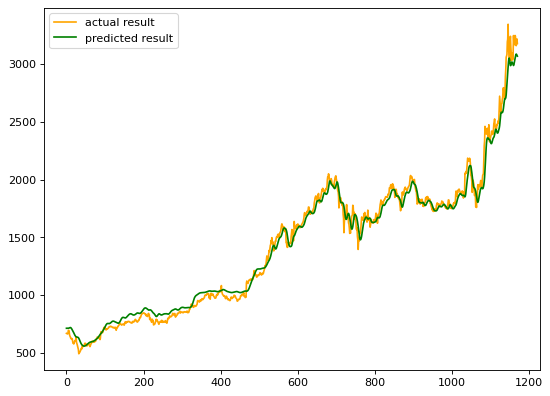

In [145]:
figure(figsize=(8, 6), dpi=80)
plt.plot(y_test, color="orange", label = "actual result")
plt.plot(predicted, color="green", label = "predicted result")
plt.legend()
plt.show()

This figure is computed by getting 1 future output from 70 past inputs

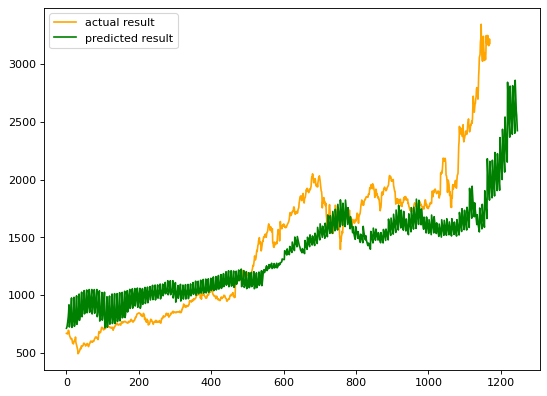

In [151]:
figure(figsize=(8, 6), dpi=80)
plt.plot(y_test, color="orange", label = "actual result")
plt.plot(predicted, color="green", label = "predicted result")
plt.legend()
plt.show()

This figure is computed by getting 1 future output from 70 past inputs. 

Each 7 day is computed with using the estimated values. For ex. 

days 1-70 --> 71

days 2-70 + previously estimated 71 --> 72

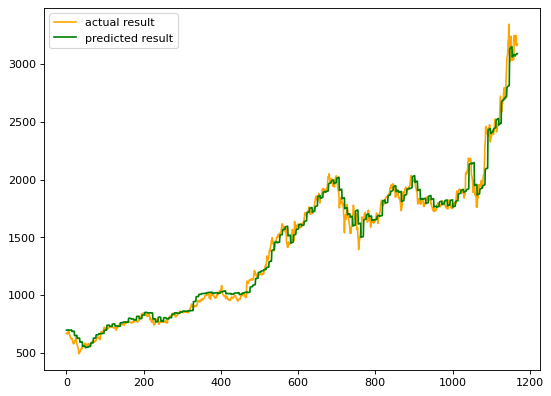

In [156]:
figure(figsize=(8, 6), dpi=80)
plt.plot(y_test, color="orange", label = "actual result")
plt.plot(predicted, color="green", label = "predicted result")
plt.legend()
plt.show()

This figure is computed by getting 7 future output from 70 past inputs.